In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)

    accuracy = accuracy_score(y_test, pred)

    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    f1 = f1_score(y_test, pred)

    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)

    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):

    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv("../../../data/santander-customer-satisfaction/train.csv", encoding='latin-1')
predict_df = pd.read_csv("../../../data/santander-customer-satisfaction/test.csv", encoding='latin-1')
santander_submission_df = pd.read_csv("../../../data/santander-customer-satisfaction/sample_submission.csv", encoding='latin-1')

print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [8]:
predict_df.head(3)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95


In [9]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [3]:
print('santander customer satisfaction: 데이터 세트 Null 값 갯수 ',cust_df.isnull().sum().sum(), "\n")

cust_df['var3'].value_counts()

santander customer satisfaction: 데이터 세트 Null 값 갯수  0 



var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: count, Length: 208, dtype: int64

In [3]:
from sklearn.model_selection import train_test_split

# var3 피처 값 대체(2가 많으니 2로 대체) 및 ID 피처 드롭 -> 고민이 필요함
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# predict_df에서의 ID 드롭
predict_df.drop('ID', axis=1, inplace=True)

cust_df['var3'].value_counts()

var3
2      74281
8        138
9        110
3        108
1        105
       ...  
231        1
188        1
168        1
135        1
87         1
Name: count, Length: 207, dtype: int64

In [4]:
# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X = cust_df.iloc[:, :-1]
y = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X.shape))
print('피처 데이터 shape:{0}'.format(y.shape))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape), '\n')

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt * 100)

print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt * 100, '\n')

# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리.
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)
print('학습 세트 Shape:{0}, 검증 세트 Shape:{1}'.format(X_tr.shape , X_val.shape))

피처 데이터 shape:(76020, 369)
피처 데이터 shape:(76020,)
학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369) 

학습 세트 레이블 값 분포 비율
TARGET
0    96.096422
1     3.903578
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    95.830045
1     4.169955
Name: count, dtype: float64 

학습 세트 Shape:(42571, 369), 검증 세트 Shape:(18245, 369)


In [5]:
from imblearn.over_sampling import SMOTE

# SMOTE 인스턴스 생성
smote = SMOTE(random_state=42)

print(f"y_train value count: \n{y_train.value_counts()}", "\n")

# 오버샘플링 적용
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ndarray 형태가 되므로 다시 DataFrame과 Series로 변환 (남은 전처리가 없다면 하지 않아도 무방)
resampled_X = pd.DataFrame(X_train_resampled, columns = X_train.columns)
resampled_Y = pd.Series(y_train_resampled)

print(f"resampled_Y value count: \n{resampled_Y.value_counts()}", "\n")

y_train value count: 
TARGET
0    58442
1     2374
Name: count, dtype: int64 

resampled_Y value count: 
TARGET
0    58442
1    58442
Name: count, dtype: int64 



In [11]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

resampled_X = pd.DataFrame(X_train_resampled, columns = X_train.columns)
resampled_Y = pd.Series(y_train_resampled)

print(f"resampled_Y value count: \n{resampled_Y.value_counts()}", "\n")

resampled_Y value count: 
TARGET
1    59028
0    58442
Name: count, dtype: int64 



In [12]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)
X_train_resampled, y_train_resampled = smoteto.fit_resample(X_train, y_train)

resampled_X = pd.DataFrame(X_train_resampled, columns = X_train.columns)
resampled_Y = pd.Series(y_train_resampled)

print(f"resampled_Y value count: \n{resampled_Y.value_counts()}", "\n")

resampled_Y value count: 
TARGET
1    58442
0    56734
Name: count, dtype: int64 



[[13473  1097]
 [  374   260]]
ROC AUC: 0.8137
0.9032491449618522
오차 행렬
[[13473  1097]
 [  374   260]]
정확도: 0.9032, 정밀도: 0.1916, 재현율: 0.4101,    F1: 0.2612, AUC:0.8137


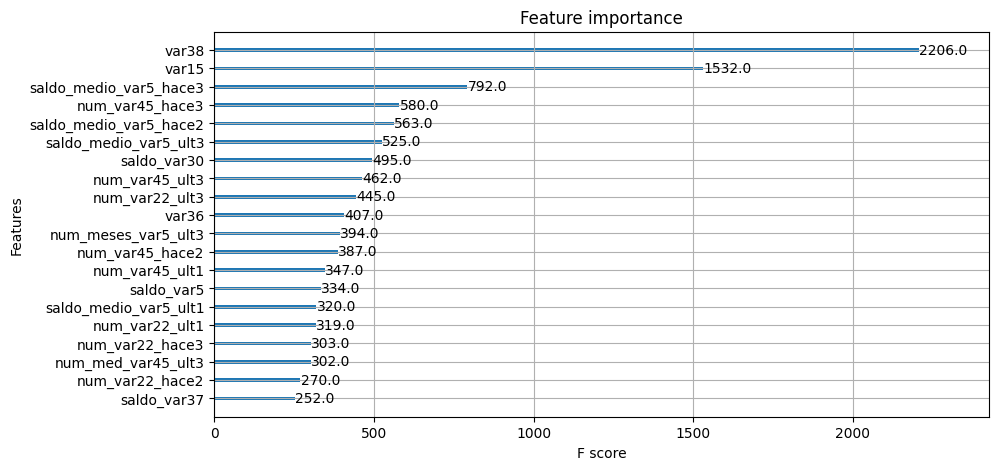

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from xgboost import plot_importance
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# ADASYN 적용
# adasyn = ADASYN()
# X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# SMOTE 적용
# smote = SMOTE(random_state=1)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# SMOTETomek 적용
smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=1)
X_train_resampled, y_train_resampled = smoteto.fit_resample(X_train, y_train)

# n_estimators는 500으로, learning_rate 0.05, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정.
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)
    
# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.
xgb_clf.fit(X_train_resampled, y_train_resampled, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train_resampled, y_train_resampled), (X_val, y_val)], verbose=False)
# xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)], verbose=False)
y_pred = xgb_clf.predict(X_test)
    
# 오차 행렬
cm = confusion_matrix(y_test, y_pred)
print(cm)
    
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

print(accuracy_score(y_test, y_pred))
    
preds = xgb_clf.predict(X_test)
pred_probs = xgb_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , preds, pred_probs)
  
fig, ax = plt.subplots(figsize=(10, 5))
plot_importance(xgb_clf, ax=ax, max_num_features=20)
plt.show()

In [27]:
predict_santander_pred_xgb = xgb_clf.predict(predict_df)
print(f"predict_santander 예측: {predict_santander_pred_xgb[:10]}")

santander_submission_df['TARGET'] = predict_santander_pred_xgb
santander_submission_df.to_csv('santander_submission_xgb.csv',index=False)
santander_submission_df

predict_santander 예측: [0 0 0 0 0 1 0 1 0 0]


,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
...,...,...
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,1


In [28]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색.
# hp.uniform 균일 분포(Uniform Distribution)에서 하이퍼파라미터 값을 샘플링
# 균일 분포란 특정 구간 내에서 모든 값이 동일한 확률을 가지는 확률 분포를 말합니다. 즉, 어떤 값이 선택될 확률이 균일하게 분포되어 있다.
# [0.5, 0.95] 구간 내에서 균일하게 분포된 값을 'colsample_bytree' 하이퍼파라미터에 대한 후보 값으로 샘플링 = 0.5와 0.95 사이의 값들을 후보로 고려
xgb_search_space = {'max_depth': hp.quniform('max_depth', 2, 10, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    # 'n_estimators' : hp.uniform('n_estimators', 2, 50, 1)
                    # 'reg_alpha' : hp.uniform('reg_alpha', 0.1, 1, 0.1)
                   }

In [29]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import SVMSMOTE
# pip install imbalanced-learn

# SMOTE 적용
# smote = SMOTE(random_state=1)
# svmsmote = SVMSMOTE(random_state=1)
smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=1)
X_train_resampled, y_train_resampled = smoteto.fit_resample(X_train, y_train)

# 목적 함수 설정.
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.
def objective_func(search_space):
    xgb_clf = XGBClassifier(
                            n_estimators=50,
                            # n_estimators=int(search_space['n_estimators']),
                            max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate'],
                            early_stopping_rounds=30,
                            eval_metric='auc')

    # 5개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    f1_scores = []

    # 5개 k-fold방식 적용
    kf = KFold(n_splits=5)

    # X_train을 다시 학습과 검증용 데이터로 분리
    # X_train 데이터에 대한 학습 인덱스(tr_index)와 검증 인덱스(val_index)를 얻는다.
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # SMOTE 적용
        # X_train_resampled, y_train_resampled = smote.fit_resample(X_tr, y_tr)
        X_train_resampled, y_train_resampled = smoteto.fit_resample(X_train, y_train)

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        xgb_clf.fit(X_train_resampled, y_train_resampled, eval_set=[(X_train_resampled, y_train_resampled), (X_val, y_val)], verbose=False)

        # 1로 예측한 확률값 추출후 f1 계산하고 평균 f1 계산을 위해 list에 결과값 담음.
        y_pred = xgb_clf.predict(X_val)
        f1 = f1_score(y_val, y_pred)
        f1_scores.append(f1)

    # 5개 k-fold로 계산된 f1 값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1 * np.mean(f1_scores)

In [30]:
from hyperopt import fmin, tpe, Trials
from xgboost import XGBClassifier

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials,
            rstate=np.random.default_rng())

print('best:', best)

 44%|█▎ | 22/50 [1:47:38<2:16:59, 293.55s/trial, best loss: -0.3311820018191495]


KeyboardInterrupt: 

ROC AUC: 0.8034


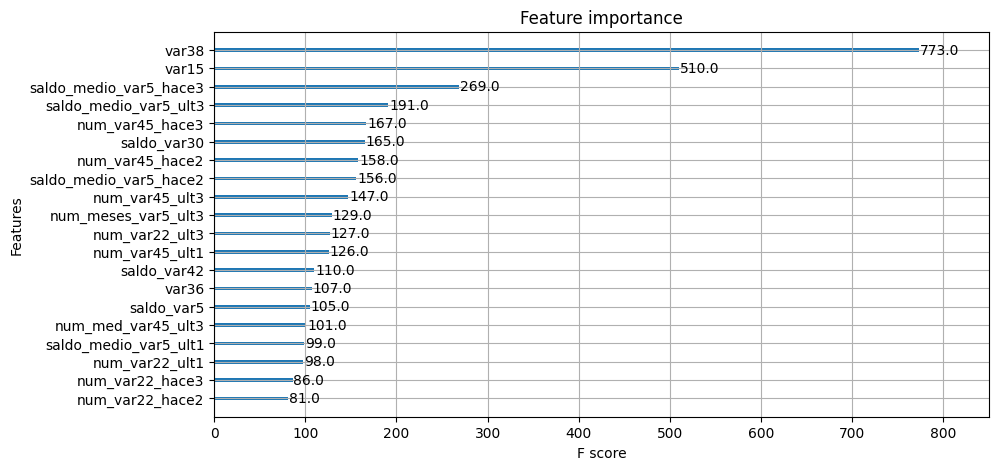

오차 행렬
[[13540  1030]
 [  394   240]]
정확도: 0.9063, 정밀도: 0.1890, 재현율: 0.3785,    F1: 0.2521, AUC:0.8034


In [14]:
from xgboost import plot_importance

xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']),
                        colsample_bytree=round(best['colsample_bytree'], 5))

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행.
xgb_clf.fit(X_train_resampled, y_train_resampled, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_train_resampled, y_train_resampled), (X_val, y_val)], verbose=False)

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

fig, ax = plt.subplots(figsize=(10, 5))
plot_importance(xgb_clf, ax=ax, max_num_features=20)
plt.show()


ws_preds = xgb_clf.predict(X_test)
ws_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws_preds, ws_pred_proba)

In [15]:
predict_santander_pred_xgb = xgb_clf.predict(predict_df)
print(f"predict_santander 예측: {predict_santander_pred_xgb[:10]}")

santander_submission_df['TARGET'] = predict_santander_pred_xgb
santander_submission_df.to_csv('santander_submission_xgb_hyper.csv',index=False)
santander_submission_df

predict_santander_Voting 예측: [0 0 0 0 0 1 0 1 0 0]


,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
...,...,...
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,1
